In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
vel=np.loadtxt('vel.txt')/1000

In [3]:
a=np.loadtxt('21cmsurvey.txt')

In [8]:
a[0,0]

147.3099996928

In [13]:
len(a[0])

103

In [14]:
len(vel)

172

In [10]:
spgr=a[1:]

Text(0,0.5,'Tb (K)')

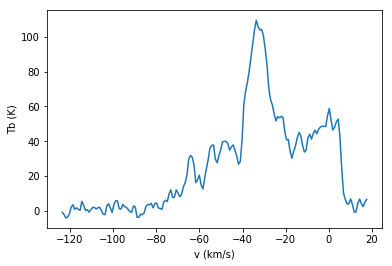

In [15]:
plt.plot(vel,spgr[:,0])
plt.xlabel("v (km/s)")
plt.ylabel("Tb (K)")

In [16]:
def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

In [17]:
x=vel
y=spgr[:,0]

In [18]:
y.max()

109.52811431884766

In [19]:
y.argmax()

62

Text(0,0.5,'Tb (K)')

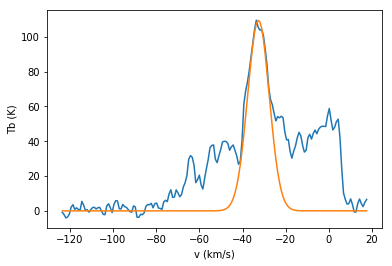

In [36]:
g1=gauss(x, y.max(),x[np.argmax(y)]+1,5)
hist_fit = g1

plt.plot(x, y, label='Test data')
plt.plot(x, hist_fit, label='Fitted data')
plt.xlabel("v (km/s)")
plt.ylabel("Tb (K)")

In [37]:
np.trapz(hist_fit, dx=dv)

1372.7313410932004

Text(0,0.5,'Tb (K)')

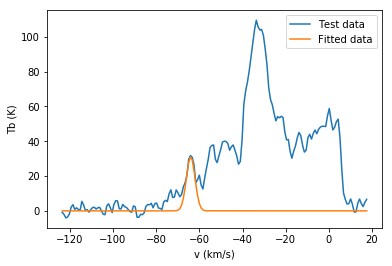

In [31]:
g1=gauss(x, 31,-64,2)

hist_fit = g1

plt.plot(x, y, label='Test data')
plt.plot(x, hist_fit, label='Fitted data')
plt.legend()
plt.xlabel("v (km/s)")
plt.ylabel("Tb (K)")

In [34]:
dv=vel[0]-vel[1]

In [35]:
np.trapz(hist_fit, dx=dv)

155.41095302712196

In [38]:
from lmfit.models import ExponentialModel, GaussianModel

In [45]:
gauss1 = GaussianModel(prefix='g1_')
pars=gauss1.make_params()

pars['g1_center'].set(value=-30, min=-40, max=-20)
pars['g1_sigma'].set(value=2, min=1,max=10)
pars['g1_height'].set(min=20,max=3000)
                         
#gauss2 = GaussianModel(prefix='g2_')
#pars.update(gauss2.make_params())                        

In [46]:
mod = gauss1

In [47]:
#init = mod.eval(pars, x=x)
out = mod.fit(y, pars, x=x)

print(out.fit_report(min_correl=0.5))

[[Model]]
    Model(gaussian, prefix='g1_')
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 74
    # data points      = 172
    # variables        = 3
    chi-square         = 63841.2895
    reduced chi-square = 377.759109
    Akaike info crit   = 1023.66568
    Bayesian info crit = 1033.10817
[[Variables]]
    g1_center:    -31.3280245 +/- 0.64394853 (2.06%) (init = -30)
    g1_sigma:      10.0000000 +/- 0.00160710 (0.02%) (init = 2)
    g1_amplitude:  2307.59165 +/- 128.690044 (5.58%) (init = 1)
    g1_fwhm:       23.5482000 +/- 0.00378442 (0.02%) == '2.3548200*g1_sigma'
    g1_height:     92.0595920 +/- 5.14254643 (5.59%) == '0.3989423*g1_amplitude/max(2.220446049250313e-16, g1_sigma)'
[[Correlations]] (unreported correlations are < 0.500)
    C(g1_sigma, g1_amplitude) = -0.577


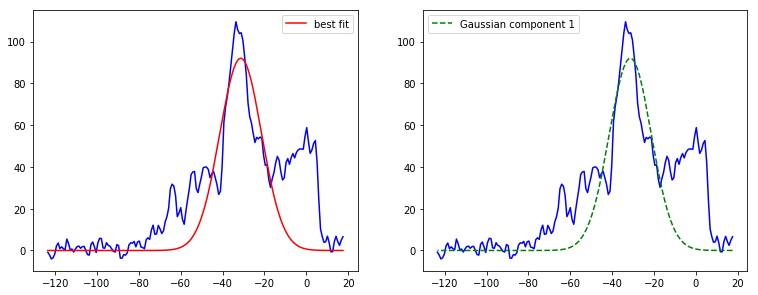

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(12.8, 4.8))
axes[0].plot(x, y, 'b')
#axes[0].plot(x, init, 'k--', label='initial fit')
axes[0].plot(x, out.best_fit, 'r-', label='best fit')
axes[0].legend(loc='best')

comps = out.eval_components(x=x)
axes[1].plot(x, y, 'b')
axes[1].plot(x, comps['g1_'], 'g--', label='Gaussian component 1')


axes[1].legend(loc='best')

In [54]:
out.params

name,value,standard error,relative error,initial value,min,max,vary,expression
g1_center,-31.3280245,0.64394853,(2.06%),-30,-40.0000000,-20.0000000,True,
g1_sigma,10.0000000,0.00160710,(0.02%),2,1.00000000,10.0000000,True,
g1_amplitude,2307.59165,128.690044,(5.58%),1.0,-inf,inf,True,
g1_fwhm,23.5482000,0.00378442,(0.02%),4.70964,-inf,inf,False,2.3548200*g1_sigma
g1_height,92.0595920,5.14254643,(5.59%),20,20.0000000,3000.00000,False,"0.3989423*g1_amplitude/max(2.220446049250313e-16, g1_sigma)"


In [53]:
out.params['g1_center'].value #v_LOS

-31.328024454534606